<a href="https://colab.research.google.com/github/0seoyeon/tobigs-21st/blob/main/Week2/Regression/%EA%B3%B5%EC%84%9C%EC%97%B0/Tobigs_Week2_regression_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [과제 3] 로지스틱 회귀분석
### - sklearn 패키지를 사용해 로지스틱 회귀분석을 진행해주세요.
### - 성능지표를 계산하고 이에 대해 해석해주세요.
### - 성능 개선을 시도해주세요. (어떠한 성능지표를 기준으로 개선을 시도했는지, 그 이유도 함께 적어주세요.)
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

## Data

출처 : https://www.kaggle.com/mlg-ulb/creditcardfraud


* V1 ~ V28 : 비식별화 된 개인정보
* **Class** : Target 변수  
  - 1 : fraudulent transactions (사기)
  - 0 : otherwise

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, RocCurveDisplay
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os

# 현재 작업 디렉토리 확인
current_directory = os.getcwd()
print("Current directory:", current_directory) # /content

# 작업 디렉토리 내의 파일 목록 확인
# os.listdir(current_directory)

# 작업 디렉토리 변경
new_directory = os.chdir('/content/drive/MyDrive/Tobigs/regular_session')
current_directory = os.getcwd()
print('Current directory:', current_directory)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Current directory: /content/drive/My Drive/Tobigs/regular_session
Current directory: /content/drive/MyDrive/Tobigs/regular_session


In [ ]:
data = pd.read_csv("./data/assignment3_creditcard.csv")

In [ ]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0


# 결측치 처리

In [ ]:
data.info() # 결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28678 entries, 0 to 28677
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      28678 non-null  float64
 1   V2      28678 non-null  float64
 2   V3      28678 non-null  float64
 3   V4      28678 non-null  float64
 4   V5      28678 non-null  float64
 5   V6      28678 non-null  float64
 6   V7      28678 non-null  float64
 7   V8      28678 non-null  float64
 8   V9      28678 non-null  float64
 9   V10     28678 non-null  float64
 10  V11     28678 non-null  float64
 11  V12     28678 non-null  float64
 12  V13     28678 non-null  float64
 13  V14     28678 non-null  float64
 14  V15     28678 non-null  float64
 15  V16     28678 non-null  float64
 16  V17     28678 non-null  float64
 17  V18     28678 non-null  float64
 18  V19     28678 non-null  float64
 19  V20     28678 non-null  float64
 20  V21     28678 non-null  float64
 21  V22     28678 non-null  float64
 22

# 이상치 처리
이상치를 처리하면 class값이 1인 인스턴스가 모조리 제거되어서 모델 학습이 제대로 이루어지지 않는 문제가 발생한다. 따라서 이상치 처리 과정을 생략했다.

# 학습/테스트 데이터셋 분리

In [ ]:
X = data.drop('Class', axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20074, 28), (8604, 28), (20074,), (8604,))

# 데이터 단위 조정 (Scaling)

In [ ]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,...,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000
mean,-0.015438,0.053653,-0.046031,0.037348,-0.033724,-0.003299,-0.051054,0.006064,-0.018530,-0.041149,...,0.002633,0.010289,-0.000656,-0.004800,-0.000897,-0.001989,-0.000765,0.000948,0.001535,0.008578
std,2.031529,1.616186,1.758169,1.482109,1.486998,1.339259,1.454827,1.364342,1.134065,1.252593,...,0.720307,0.847152,0.739469,0.593663,0.603349,0.517968,0.483852,0.397075,0.296736,0.092221
min,-30.552380,-42.172688,-31.103685,-5.560118,-42.147898,-21.929312,-41.506796,-39.267378,-13.434066,-24.403185,...,-21.387122,-21.453736,-8.887017,-36.666000,-2.718024,-6.712624,-2.241620,-7.418878,-9.617915,0.000000
25%,-0.916927,-0.575381,-0.899872,-0.843321,-0.714901,-0.763757,-0.568146,-0.206103,-0.661909,-0.543450,...,-0.209678,-0.225520,-0.539244,-0.160583,-0.356047,-0.318619,-0.327343,-0.070558,-0.052189,0.000000
50%,0.020050,0.075358,0.180610,-0.008844,-0.060040,-0.271363,0.036107,0.022463,-0.055095,-0.097390,...,-0.062792,-0.028778,0.007302,-0.011199,0.040006,0.019770,-0.056260,0.002049,0.011075,0.000000
75%,1.317461,0.806957,1.029928,0.771958,0.613328,0.397269,0.559409,0.329606,0.605704,0.460681,...,0.131199,0.184312,0.526358,0.146835,0.437146,0.352717,0.240713,0.091637,0.078911,0.000000
max,2.399484,21.467203,4.069865,11.927512,32.911462,22.529298,36.677268,20.007208,8.113152,15.236028,...,26.237391,27.202839,8.361985,9.637187,3.948061,2.510401,3.122747,11.135740,14.929133,1.000000


In [ ]:
# Scaling
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns) # 학습 데이터셋에 대해 fit한 scaler로 테스트 데이터셋을 스케일링

# 결과 확인
X_train.head(3), X_test.head(3)

(         V1        V2        V3        V4        V5        V6        V7  \
 0 -0.480995  0.617435  0.700137 -0.206842  0.381067 -0.186005  0.596680   
 1  0.938727 -0.207735 -0.734406 -0.002711  0.509461  0.669024 -0.075593   
 2 -0.436249 -3.699502 -3.230865 -0.457501  0.697152  2.332251  1.420959   
 
          V8        V9       V10  ...       V19       V20       V21       V22  \
 0  0.044127 -0.349149 -0.045153  ... -0.473892 -0.163506  0.012695  0.015385   
 1  0.202426  0.277092  0.110619  ... -0.671429 -0.391690 -0.210925 -0.410399   
 2 -0.027165 -1.226391  0.187617  ...  0.110278  4.621726  1.686414  0.648232   
 
         V23       V24       V25       V26       V27       V28  
 0 -0.584647 -0.643776  1.671574 -0.795480 -0.113917 -0.000085  
 1  0.594507 -2.492913 -0.969886  0.617545 -0.054892 -0.288947  
 2 -2.647584  1.477395  0.385189  0.292445 -0.982158  0.638034  
 
 [3 rows x 28 columns],
          V1        V2        V3        V4        V5        V6        V7  \
 0 -0.

# 모델 학습 및 추론 (Logistic Regression)

In [ ]:
# 모델 학습
lr = LogisticRegression(random_state=0).fit(X_train, y_train)

In [ ]:
# 학습된 모델의 계수
print("coefficient = ", lr.coef_)
print("intercept = ", lr.intercept_)

coefficient =  [[ 0.27230865 -0.24490143 -0.15324686  1.21933172 -0.09376435 -0.18394831
  -0.07199731 -0.28893518 -0.07594531 -0.82117359  0.10431565 -0.28759585
  -0.14997891 -0.66841992 -0.2012966  -0.32469178  0.15074782 -0.16045945
  -0.18680036 -0.23409705  0.30576895  0.42881201  0.05445288  0.14078268
   0.08986949 -0.21136926 -0.42926948 -0.09822091]]
intercept =  [-7.62616178]


In [ ]:
# 테스트 데이터셋에 대한 모델 예측 확률
y_prob = lr.predict_proba(X_test)
y_log_prob = lr.predict_log_proba(X_test) # 로그를 취한 확률

In [ ]:
# 모델에 의한 클래스 예측값
y_pred = lr.predict(X_test)

# 모델 평가
- Accuracy
- Confucion matrix
- Precision
- Recall
- f1 score

In [ ]:
print('confusion matrix = \n', confusion_matrix(y_true=y_test, y_pred=y_pred))
print('accuracy = ', accuracy_score(y_true=y_test, y_pred=y_pred))
print('precision = ', precision_score(y_true=y_test, y_pred=y_pred))
print('recall = ', recall_score(y_true=y_test, y_pred=y_pred))
print('f1 score = ', f1_score(y_true=y_test, y_pred=y_pred))

confusion matrix = 
 [[8525    0]
 [  22   57]]
accuracy =  0.997443049744305
precision =  1.0
recall =  0.7215189873417721
f1 score =  0.8382352941176471


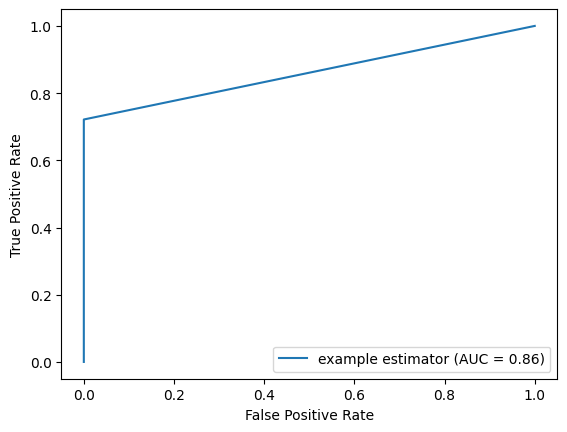

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()

- 정확도가 0.99로 모델의 성능이 상당히 높아보인다. 그러나 precision, recall, f1 score를 통해서 구체적인 성능을 평가할 수 있다.

- precision이 1이라는 것은 실제 Positive 클래스에 대해서 모델이 전부 Positive로 예측하였다는 뜻이고, recall이 0.72라는 것은 모델이 Positive라고 예측한 클래스 중 72%만이 실제 Positive라는 의미이다. 즉 이 모델은 negative에 대해서도 positive로 응답하는 경향이 높은 모델이라고 할 수 있다.

- 위와 같이 precision, recall을 통해 확인할 수 있는 약간의 비대칭성을 반영한다면 성능이 accuracy보다 다소 낮아짐을 f1 score로 확인할 수 있다.

# 하이퍼파라미터 튜닝
조정할 파라미터 종류:
- penalty(규제 유형): {‘l1’, ‘l2’, ‘elasticnet’, None}, default=’l2’
- C(inverse of regularization, 규제 강도의 역수, 일반화 목적의 규제): float, default=1.0
- tol(최적화를 중지하는 기준): tolerance for stopping criteria, float, default=1e-4
- solver: {‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’}, default=’lbfgs’
- max_iter: default = 100
  
시간효율적인 Random Search 방법을 이용해서 튜닝했다.

In [ ]:
lr = LogisticRegression(random_state=0)

param_grid = {
    'penalty': ('l1', 'l2', 'elasticnet', None),
    'C': (0.01, 0.1, 1, 10),
    'tol': (0.1, 0.0001, 0.000001),
    'solver': ('lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'),
    'max_iter': (100, 200, 300)
}

lr_cv = RandomizedSearchCV(lr, param_grid, cv=5, scoring='accuracy')

lr_cv.fit(X_train,y_train)

print("best parameters: ",lr_cv.best_params_)
print("accuracy:",lr_cv.best_score_)

best parameters:  {'tol': 0.0001, 'solver': 'sag', 'penalty': None, 'max_iter': 200, 'C': 0.1}
accuracy: 0.9977084934981612


In [ ]:
# best parameters로 학습시킨 모델의 성능 확인

# 모델 학습
tuned_lr = LogisticRegression(tol=0.0001, solver='sag', penalty=None, max_iter=200, C=0.1, random_state=0).fit(X_train, y_train)

# 모델으로 예측
y_pred = tuned_lr.predict(X_test)

# 모델 평가
print('confusion matrix = \n', confusion_matrix(y_true=y_test, y_pred=y_pred))
print('accuracy = ', accuracy_score(y_true=y_test, y_pred=y_pred))
print('precision = ', precision_score(y_true=y_test, y_pred=y_pred))
print('recall = ', recall_score(y_true=y_test, y_pred=y_pred))
print('f1 score = ', f1_score(y_true=y_test, y_pred=y_pred))
# default보다 성능이 저하된 모습을 확인할 수 있었다. 이유는 추후 탐구해볼 예정이다.

confusion matrix = 
 [[8524    1]
 [  22   57]]
accuracy =  0.9973268247326825
precision =  0.9827586206896551
recall =  0.7215189873417721
f1 score =  0.8321167883211679
